# COURSE ASSESSMENT: MACHINE LEARNING IN HEALTHCARE
## Topic: Support Vector Machine model for Diabetes Classification
### Objectives:
- Apply EDA techniques to better understand diabetes data.
- Build and evaluate a SVM model to categorize diabetes.
- Analyze and interpret the results of the model.
#### Data: Use the data provided (Diabetes.csv)
Nguyen Duc Hung - 20233960


# Install dependencies and import:

dependencies can be install via dependencies.yml

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Part 1: Data Preparation and Cleaning (3 points)


# Step 1: Load the data

1.	(1 point) Load the data into your working environment (e.g., Pandas DataFrame). Display the first few rows and general information about the data (number of rows, number of columns, column data types).

In [80]:
df = pd.read_csv('Diabetes.csv')
print(df.head())

   Age  Gender   BMI  SBP  DBP   FPG  Chol   Tri   HDL   LDL   ALT   BUN  \
0   26       1  20.1  119   81  5.80  4.36  0.86  0.90  2.43  12.0  5.40   
1   40       1  17.7   97   54  4.60  3.70  1.02  1.50  2.04   9.2  3.70   
2   40       2  19.7   85   53  5.30  5.87  1.29  1.75  3.37  10.1  4.10   
3   43       1  23.1  111   71  4.50  4.05  0.74  1.27  2.60  36.5  4.38   
4   36       1  26.5  130   82  5.54  6.69  3.49  0.91  3.64  69.3  3.86   

    CCR  FFPG  smoking  drinking  family_history  Diabetes  
0  63.8  5.40      3.0       3.0               0         0  
1  70.3  4.10      1.0       1.0               0         0  
2  61.1  4.85      3.0       3.0               0         0  
3  73.4  5.30      2.0       3.0               0         0  
4  67.5  5.53      3.0       3.0               0         0  


🧾 Dataset shape: (4303, 18)
🧠 Column types:
Age                 int64
Gender              int64
BMI               float64
SBP                 int64
DBP                 int64
FPG               float64
Chol              float64
Tri               float64
HDL               float64
LDL               float64
ALT               float64
BUN               float64
CCR               float64
FFPG              float64
smoking           float64
drinking          float64
family_history      int64
Diabetes            int64
dtype: object

📊 Target variable distribution:
Diabetes
0    3000
1    1303
Name: count, dtype: int64

🔎 Missing values:
Age               0
Gender            0
BMI               0
SBP               0
DBP               0
FPG               0
Chol              0
Tri               0
HDL               0
LDL               0
ALT               0
BUN               0
CCR               0
FFPG              0
smoking           0
drinking          0
family_history    0
Diabetes          0
dtype: 

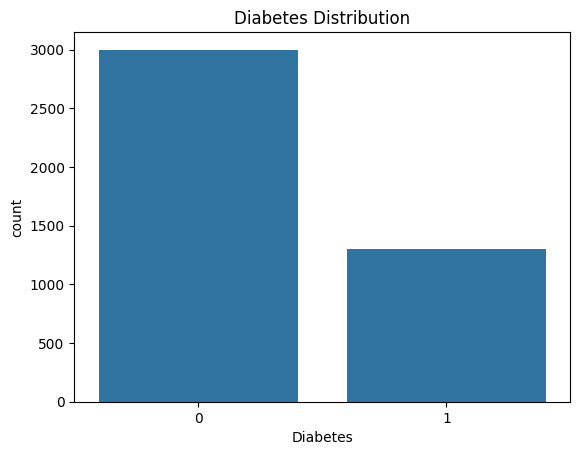

In [81]:
# Quick overview
print("🧾 Dataset shape:", df.shape)
print("🧠 Column types:")
print(df.dtypes)
print("\n📊 Target variable distribution:")
print(df['Diabetes'].value_counts())

# Check missing values
print("\n🔎 Missing values:")
print(df.isnull().sum())

# Class distribution visualization
sns.countplot(x='Diabetes', data=df)
plt.title("Diabetes Distribution")
plt.show()


## We see that overall:

## Dataset Overview
- **Rows:** 4,303  
- **Columns:** 18  
- The dataset consists of continuous and categorical clinical features used to predict the presence of diabetes.

## Column Data Types

| Feature           | Type     | Description                          |
|------------------|----------|--------------------------------------|
| Age              | int64    | Patient age                          |
| Gender           | int64    | 1 = Male, 2 = Female                 |
| BMI              | float64  | Body Mass Index                      |
| SBP              | int64    | Systolic Blood Pressure              |
| DBP              | int64    | Diastolic Blood Pressure             |
| FPG              | float64  | Fasting Plasma Glucose               |
| Chol             | float64  | Total cholesterol                    |
| Tri              | float64  | Triglycerides                        |
| HDL              | float64  | High-density lipoprotein             |
| LDL              | float64  | Low-density lipoprotein              |
| ALT              | float64  | Alanine transaminase (liver enzyme)  |
| BUN              | float64  | Blood urea nitrogen (kidney marker)  |
| CCR              | float64  | Creatinine clearance rate            |
| FFPG             | float64  | Follow-up Fasting Plasma Glucose     |
| smoking          | float64  | Coded level of smoking habit         |
| drinking         | float64  | Coded level of alcohol intake        |
| family_history   | int64    | 1 = Yes, 0 = No family history       |
| Diabetes         | int64    | Target: 1 = Diabetic, 0 = Non-diabetic |
## Target Class Distribution: Diabetic: 30%, Non-diabetic: 70%

- **Imbalanced dataset** – may bias the classifier toward the majority class.
- Consider handling with:
  - `class_weight='balanced'` in SVM
  - Sampling techniques (e.g., SMOTE, undersampling)

## Missing Values

- No missing values in any feature.  
- Dataset is clean and ready for modeling.

## Key Modeling Implications for SVM

| Area         | EDA Insight       | Impact on SVM                        |
|--------------|-------------------|--------------------------------------|
| Scaling      | All numeric       | Must apply StandardScaler            |
| Imbalance    | 70/30 class split | Use class weights or resampling      |
| Data Type    | All numeric       | SVM is suitable (no encoding needed) |
| Feature Range| Varies widely     | Normalization improves performance   |


# Step 2: Plots

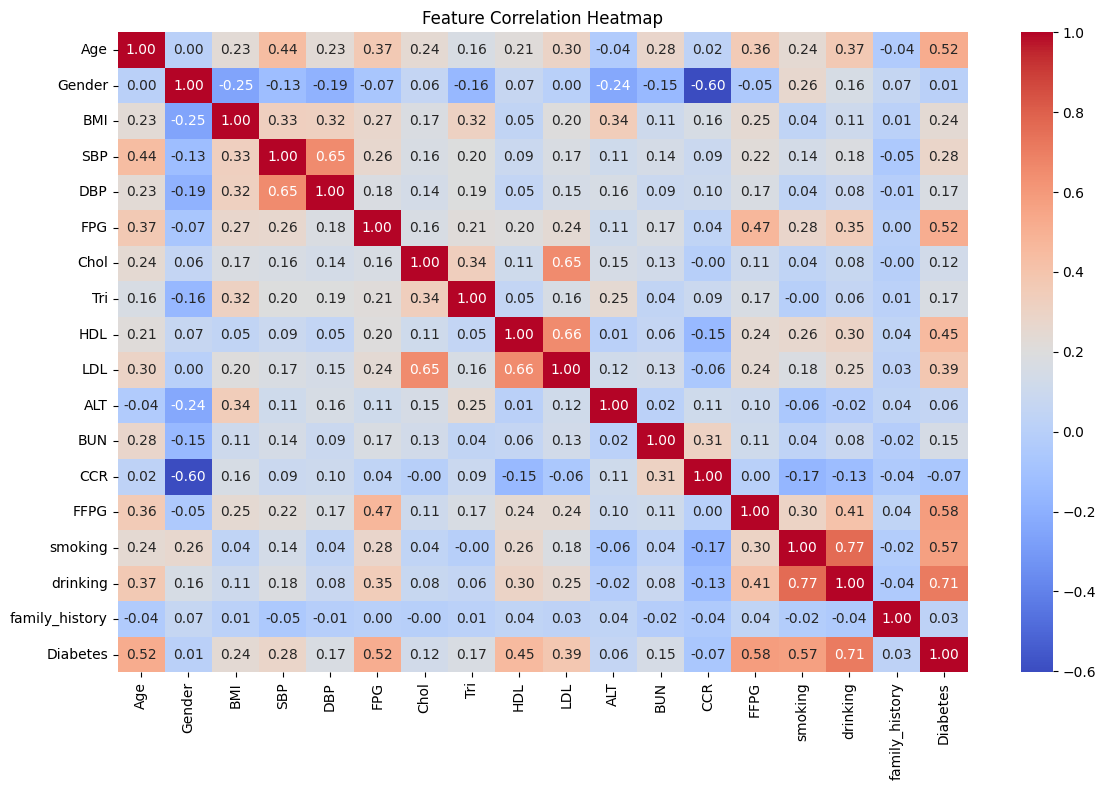

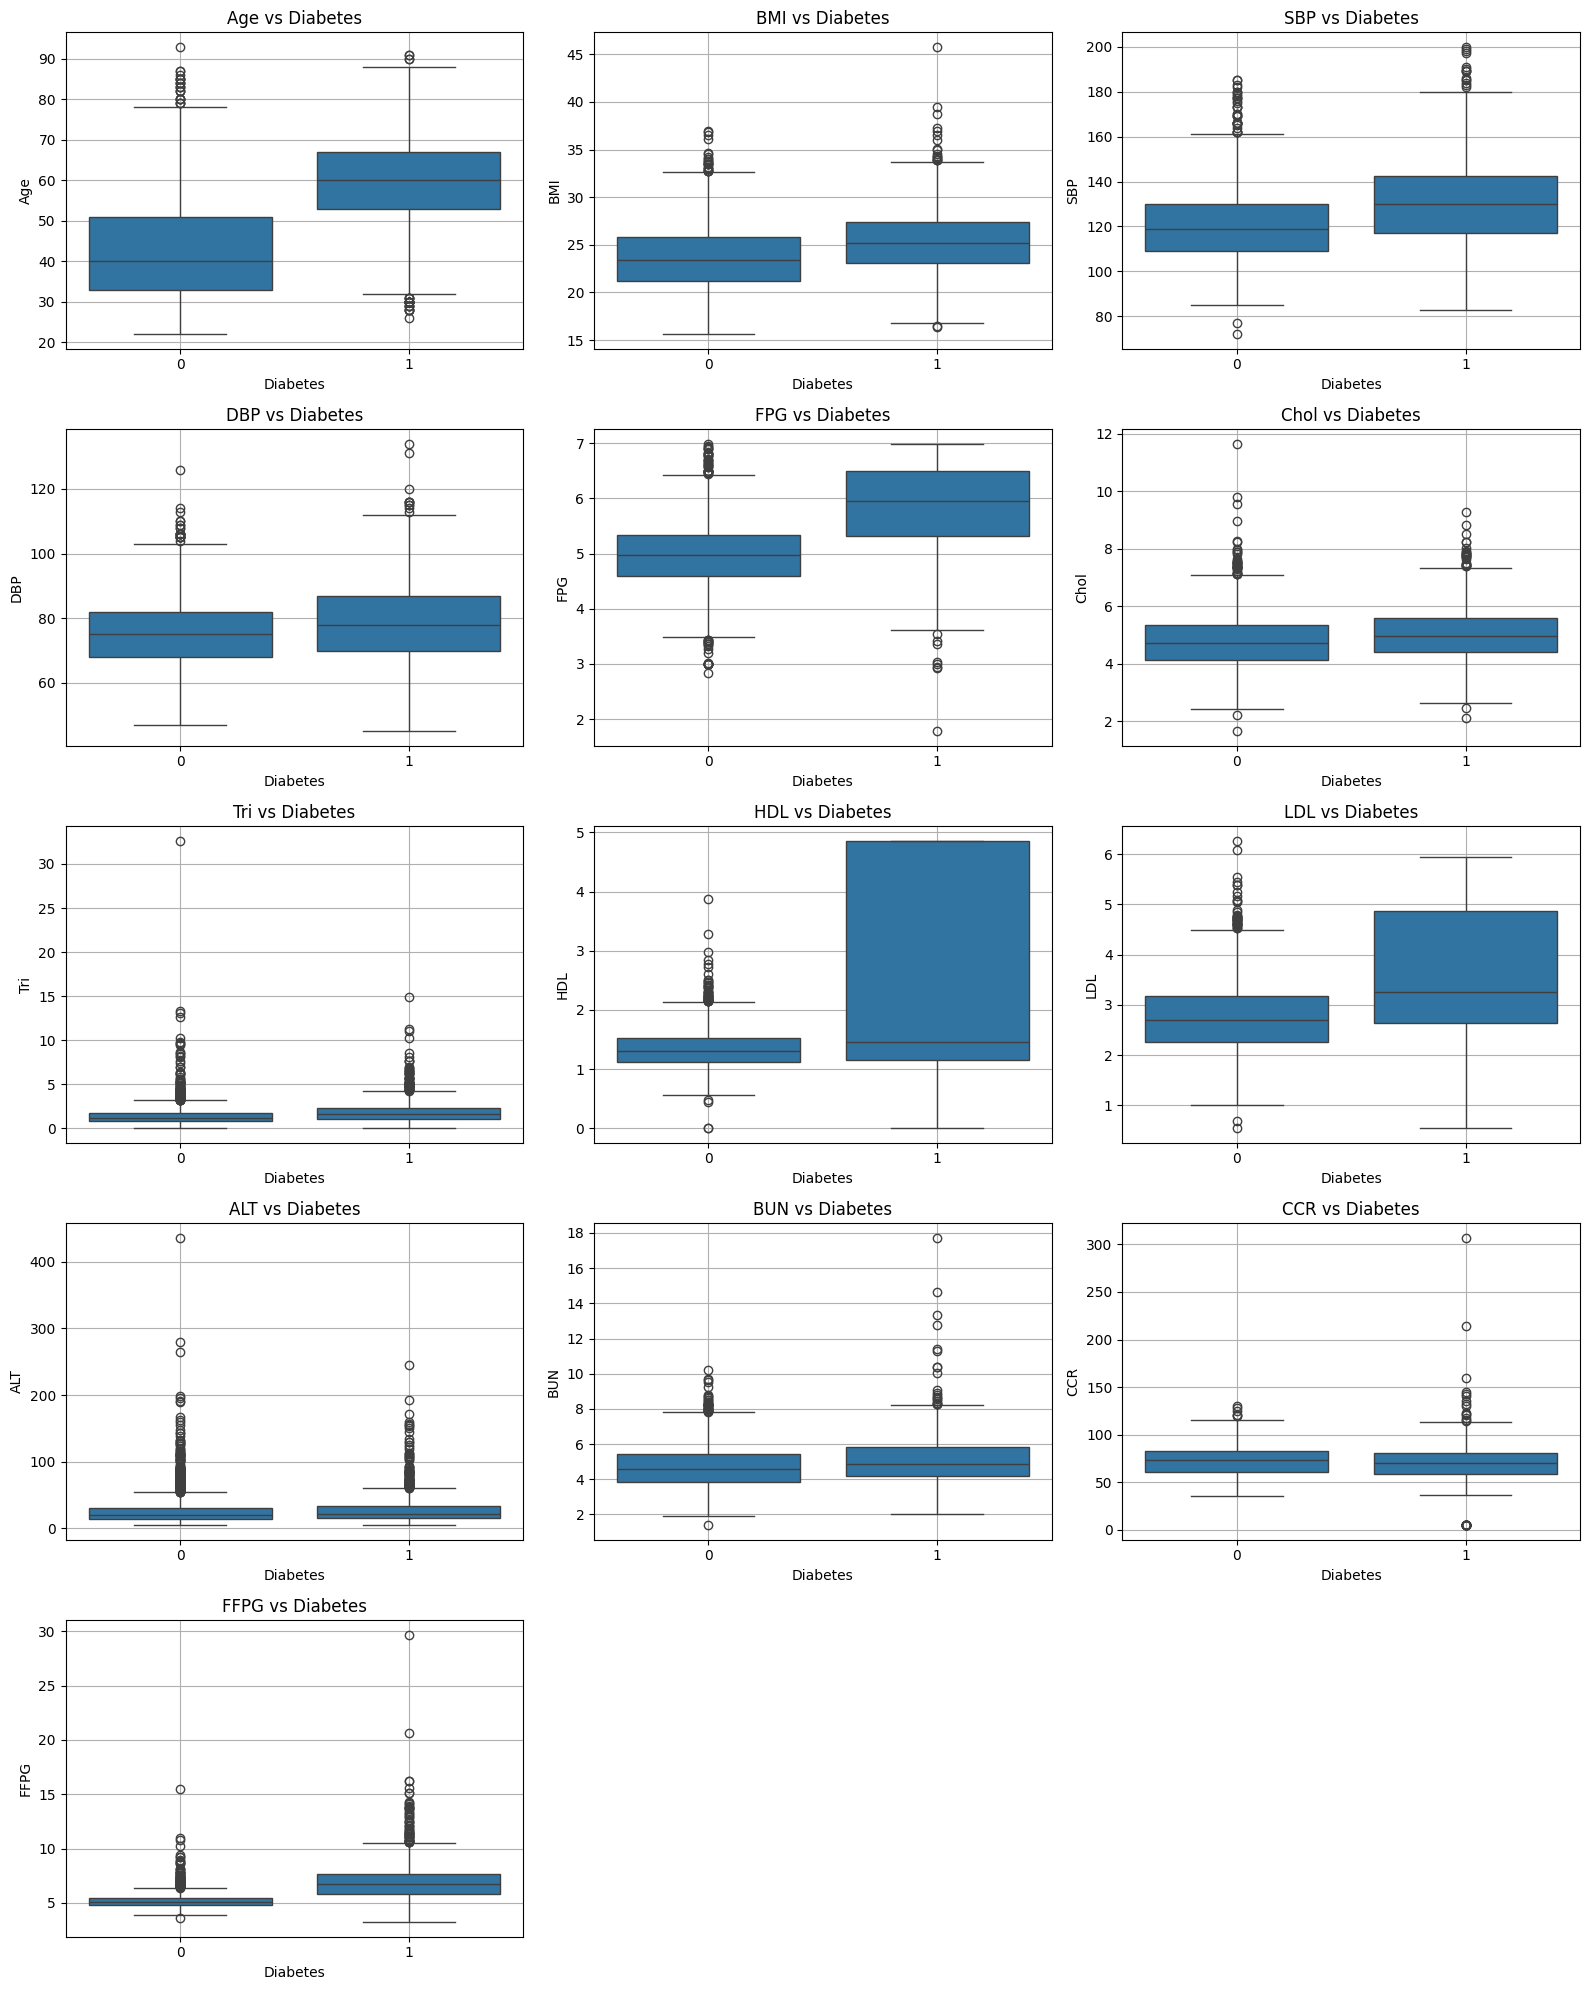

In [82]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

# List of continuous features
continuous = ['Age', 'BMI', 'SBP', 'DBP', 'FPG', 'Chol', 'Tri', 'HDL', 'LDL', 
              'ALT', 'BUN', 'CCR', 'FFPG']

# Define number of rows and columns for the grid
n_cols = 3
n_rows = int(np.ceil(len(continuous) / n_cols))

# Set figure size
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
axes = axes.flatten()  # Flatten to 1D array for easy indexing

# Create boxplots
for i, col in enumerate(continuous):
    sns.boxplot(x='Diabetes', y=col, data=df, ax=axes[i])
    axes[i].set_title(f"{col} vs Diabetes")
    axes[i].grid(True)

# Turn off empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#### Strong Positive Correlations

- Smoking ↔ Drinking (0.77): Highly correlated lifestyle factors
- SBP ↔ DBP (0.65): Expected correlation between systolic and diastolic blood pressure
- HDL ↔ LDL (0.66): Lipid profile components showing moderate correlation
- Cholesterol ↔ LDL (0.65): Expected relationship between total cholesterol and LDL

#### Strong Negative Correlations

- Gender ↔ CCR (-0.60): Significant gender-based differences in creatinine clearance
- Gender ↔ BMI (-0.25): Moderate gender differences in BMI distribution

#### Regarding diabetes
1. Drinking Habits (0.71) - STRONGEST PREDICTOR
2. Fasting Plasma Glucose Related (FFPG: 0.58)
3. Smoking (0.57)
4. Age (0.52)
5. Fasting Plasma Glucose (FPG: 0.52)

# Step 3: PCA (Prinipal Component Analysis)
## Since we would work with SVM, we have to do some heuristics work on PCA.

- When working with high-dimensional data, such as our diabetes dataset with 17 features, it’s helpful to reduce dimensionality while preserving as much useful information as possible. This is where Principal Component Analysis (PCA) comes in.

- PC1 (Principal Component 1) is the direction (a linear combination of the original features) along which the data varies the most. In other words, it captures the largest amount of variance in the dataset.

PC2 (Principal Component 2) is the direction orthogonal (at right angles) to PC1 that captures the second largest amount of variance.
These components represent new axes in the feature space, summarizing the original features into fewer dimensions while retaining maximum variance.

#### Why are PC1 and PC2 important?
- Data Visualization: By projecting data onto PC1 and PC2, we can visualize complex high-dimensional data in two dimensions. This helps us see patterns, clusters, or separability between classes (e.g., diabetic vs. non-diabetic).
- Feature Reduction: Using only the first few principal components can reduce dimensionality, leading to faster and simpler models without sacrificing much information.

- Noise Reduction: PCA can help filter out noisy or redundant features that don’t contribute much to variance, potentially improving model performance.

#### PCA in the Context of SVM
- SVM is sensitive to the number and quality of features; redundant or irrelevant features can reduce model accuracy.
- By applying PCA before SVM, we create a set of uncorrelated features (principal components) that summarize the data efficiently.
- The first few PCs often capture most of the important variation relevant to classification tasks.
- Using PCs as input to SVM can improve training speed and potentially boost classification performance by focusing on the most informative directions in the data.



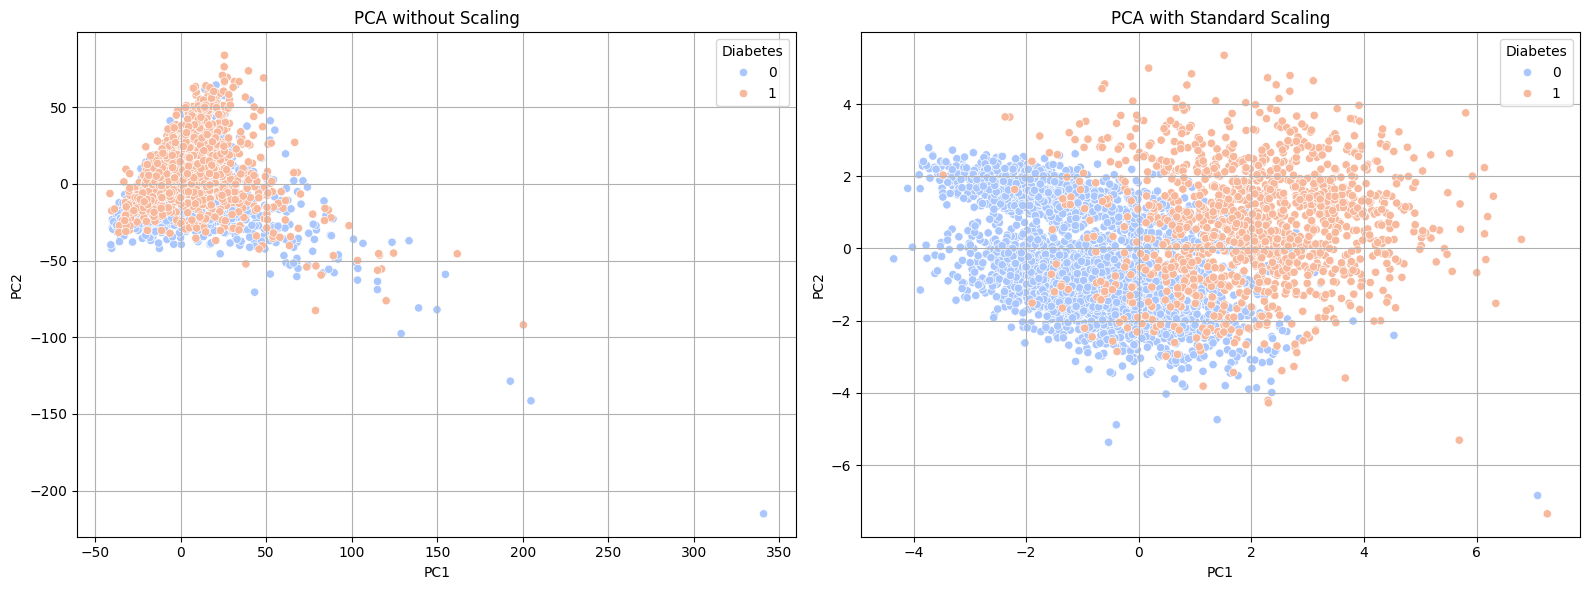


📊 Class Balance:
Diabetes
0    69.718801
1    30.281199
Name: proportion, dtype: float64


In [83]:
# Data setup
X = df.drop(columns=['Diabetes'])
y = df['Diabetes']

# PCA without scaling
pca_no_scale = PCA(n_components=2)
X_pca_no_scale = pca_no_scale.fit_transform(X)

# PCA with scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca_scale = PCA(n_components=2)
X_pca_scale = pca_scale.fit_transform(X_scaled)

# Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Without scaling
sns.scatterplot(x=X_pca_no_scale[:, 0], y=X_pca_no_scale[:, 1], hue=y, palette='coolwarm', ax=axes[0])
axes[0].set_title("PCA without Scaling")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")
axes[0].grid(True)

# With scaling
sns.scatterplot(x=X_pca_scale[:, 0], y=X_pca_scale[:, 1], hue=y, palette='coolwarm', ax=axes[1])
axes[1].set_title("PCA with Standard Scaling")
axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC2")
axes[1].grid(True)

plt.tight_layout()
plt.show()

# Class balance check (percentage)
print("\n📊 Class Balance:")
print(y.value_counts(normalize=True) * 100)


###  Visual Evidence from the Charts
#### Left Chart (PCA without Scaling)

- Extreme spread: PC1 ranges from -50 to 350, PC2 from -200 to 50
- Poor separation: Classes heavily overlap with minimal distinction
- Dominated by high-variance features: Large-scale features dominate the principal components
- Skewed distribution: Data clustered in one area with extreme outliers

#### Right Chart (PCA with Standard Scaling)

- Normalized range: Both PC1 and PC2 range approximately -6 to 6
- Better class separation: Clear distinction between blue (non-diabetic) and orange (diabetic) clusters
- Balanced contribution: All features contribute proportionally to the analysis
- Symmetric distribution: More evenly distributed data points

#### Why Scaling is Critical for PCA

1. Variance Domination Problem
- Without scaling - features with different scales such as
```python
Age: 20-80 (range: 60)
BMI: 15-40 (range: 25)  
Blood Pressure: 80-200 (range: 120)
Cholesterol: 100-400 (range: 300)  # DOMINATES!
```
- Problem: PCA finds directions of maximum variance. High-scale features (like cholesterol) will dominate the principal components, regardless of their actual importance for class separation.

2. Mathematical Foundation

#### PCA computes eigenvectors of the covariance matrix:

- Without scaling: Covariance matrix is dominated by high-variance features
- With scaling: Each feature contributes equally to the covariance structure
```python
Covariance impact
Var(Cholesterol) = 10000  # Dominates PC1
Var(Age) = 400           # Minimal contribution
Var(BMI) = 25            # Negligible impact
```

#### After scaling - all variances = 1

3. Class Separation Improvement
#### Without Scaling:

- PC1 primarily captures cholesterol variation
- PC2 captures blood pressure variation
- Age, BMI, and other important diabetes indicators are suppressed => Poor class discrimination

#### With Scaling:

- PC1 captures balanced combination of all features
- PC2 represents orthogonal health patterns
- Better representation of diabetes-related patterns
=> Clear class boundaries emerge

### We continue with PCA for 3D to expand our system, so we can have the best look:


Explained Variance Ratio:
PC1: 0.2218 (22.18%)
PC2: 0.1422 (14.22%)
PC3: 0.0917 (9.17%)

Cumulative Explained Variance:
PC1 to PC1: 0.2218 (22.18%)
PC1 to PC2: 0.3640 (36.40%)
PC1 to PC3: 0.4557 (45.57%)


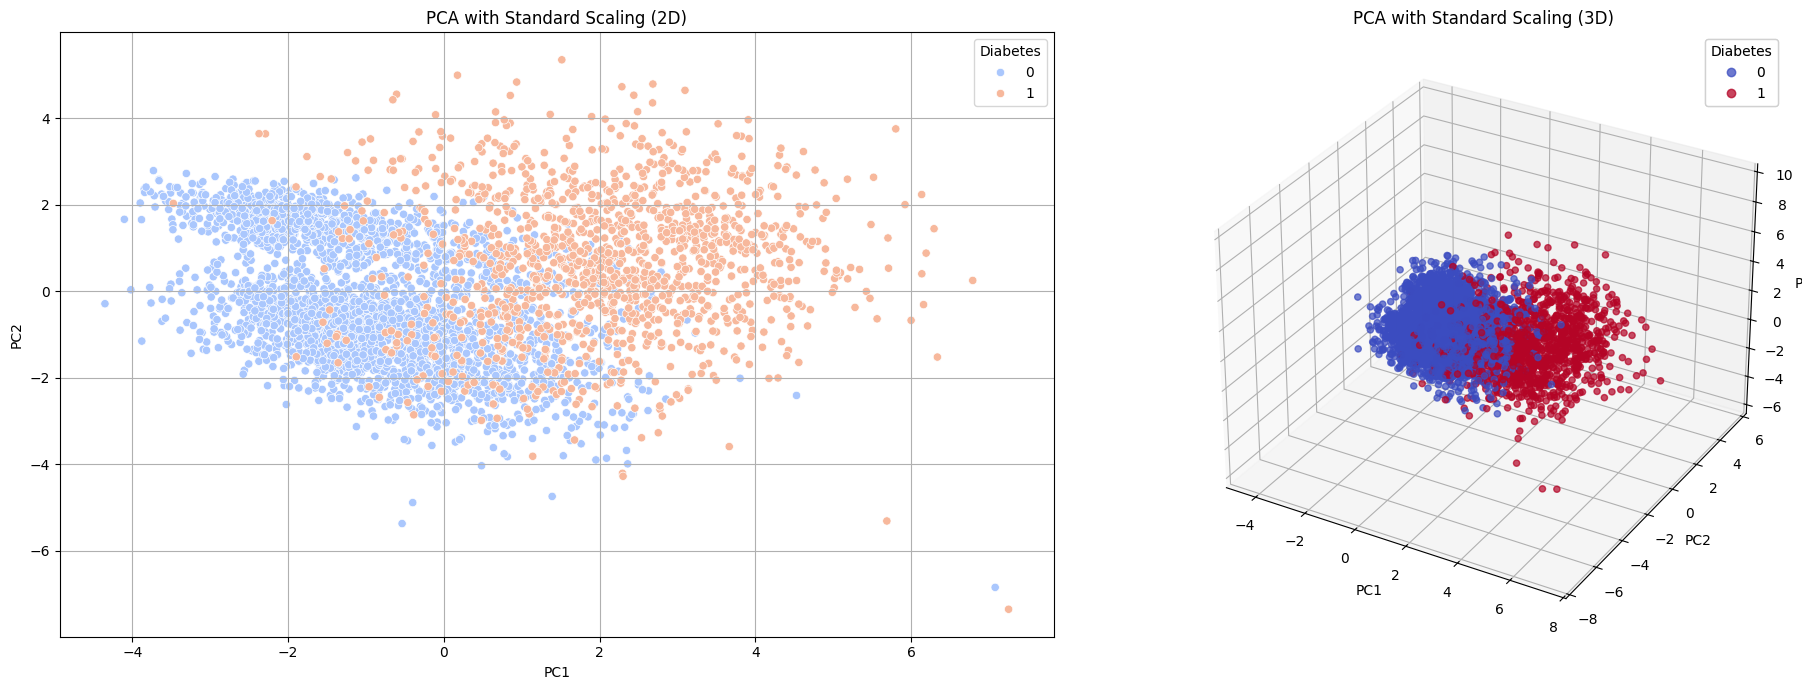


📊 Class Balance:
Diabetes
0    69.718801
1    30.281199
Name: proportion, dtype: float64


In [84]:
from mpl_toolkits.mplot3d import Axes3D  # for 3D plotting

# Data setup
X = df.drop(columns=['Diabetes'])
y = df['Diabetes']

# PCA with scaling - 2 components (for comparison plot)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# PCA with scaling - 3 components for 3D plot
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# Explained variance ratio for 3 PCs
explained_variance = pca_3d.explained_variance_ratio_
print("Explained Variance Ratio:")
for i, var_ratio in enumerate(explained_variance, start=1):
    print(f"PC{i}: {var_ratio:.4f} ({var_ratio*100:.2f}%)")

cumulative_variance = np.cumsum(explained_variance)
print("\nCumulative Explained Variance:")
for i, cum_var in enumerate(cumulative_variance, start=1):
    print(f"PC1 to PC{i}: {cum_var:.4f} ({cum_var*100:.2f}%)")
# Plot 2D and 3D PCA side by side
fig = plt.figure(figsize=(20, 7))

# 2D PCA plot
ax1 = fig.add_subplot(1, 2, 1)
sns.scatterplot(x=X_pca_2d[:, 0], y=X_pca_2d[:, 1], hue=y, palette='coolwarm', ax=ax1)
ax1.set_title("PCA with Standard Scaling (2D)")
ax1.set_xlabel("PC1")
ax1.set_ylabel("PC2")
ax1.grid(True)

# 3D PCA plot
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
scatter = ax2.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=y, cmap='coolwarm', alpha=0.7)
ax2.set_title("PCA with Standard Scaling (3D)")
ax2.set_xlabel("PC1")
ax2.set_ylabel("PC2")
ax2.set_zlabel("PC3")
ax2.grid(True)

# Add legend for classes
legend1 = ax2.legend(*scatter.legend_elements(), title="Diabetes")
ax2.add_artist(legend1)

plt.tight_layout()
plt.show()

# Class balance check (percentage)
print("\n📊 Class Balance:")
print(y.value_counts(normalize=True) * 100)


#### Yikes, we see that in 3D, PC1,2,3 only provide 45.57% of the total variation, which is high but a bit lacking, which can harm SVM performance

- So we should evaluate what is the number of dimension that provide more accruacy, but does not explode in computation

📈 Explained Variance by Component:
PC1: 0.2218 (22.18%) | Cumulative: 0.2218 (22.18%)
PC2: 0.1422 (14.22%) | Cumulative: 0.3640 (36.40%)
PC3: 0.0917 (9.17%) | Cumulative: 0.4557 (45.57%)
PC4: 0.0765 (7.65%) | Cumulative: 0.5322 (53.22%)
PC5: 0.0699 (6.99%) | Cumulative: 0.6021 (60.21%)
PC6: 0.0589 (5.89%) | Cumulative: 0.6610 (66.10%)
PC7: 0.0567 (5.67%) | Cumulative: 0.7177 (71.77%)
PC8: 0.0477 (4.77%) | Cumulative: 0.7654 (76.54%)
PC9: 0.0431 (4.31%) | Cumulative: 0.8085 (80.85%)
PC10: 0.0371 (3.71%) | Cumulative: 0.8456 (84.56%)
PC11: 0.0354 (3.54%) | Cumulative: 0.8810 (88.10%)
PC12: 0.0317 (3.17%) | Cumulative: 0.9126 (91.26%)
PC13: 0.0303 (3.03%) | Cumulative: 0.9429 (94.29%)
PC14: 0.0206 (2.06%) | Cumulative: 0.9635 (96.35%)
PC15: 0.0176 (1.76%) | Cumulative: 0.9811 (98.11%)
PC16: 0.0123 (1.23%) | Cumulative: 0.9933 (99.33%)
PC17: 0.0067 (0.67%) | Cumulative: 1.0000 (100.00%)


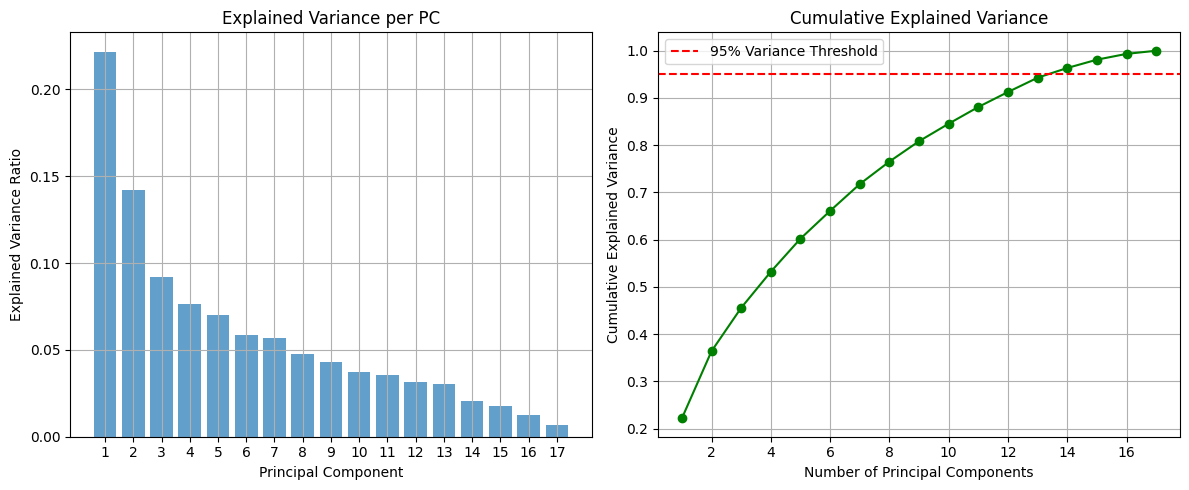

In [85]:
# Data setup
X = df.drop(columns=['Diabetes'])
y = df['Diabetes']

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA with all components
pca_full = PCA(n_components=X.shape[1])
X_pca_full = pca_full.fit_transform(X_scaled)

# Explained variance ratios
explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Print top N components
print("📈 Explained Variance by Component:")
for i, (var, cum) in enumerate(zip(explained_variance, cumulative_variance), start=1):
    print(f"PC{i}: {var:.4f} ({var*100:.2f}%) | Cumulative: {cum:.4f} ({cum*100:.2f}%)")

# Plot explained variance
plt.figure(figsize=(12, 5))

# Bar plot of individual explained variance
plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.7)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance per PC')
plt.grid(True)

# Force x-axis ticks to be whole numbers
plt.xticks(ticks=range(1, len(explained_variance)+1))

# Line plot of cumulative explained variance
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', color='green')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


#### Interesting, the correlation seems to be increasing slowly. 

#### Observations
- PC1–PC3 account for a significant portion of the variance (~45.57%), demonstrating that much of the data's structure is captured early.
- The curve increases steadily but begins to plateau after PC10, meaning each additional component contributes less to explaining the overall variance.
- By PC13, the cumulative explained variance exceeds 95%, fulfilling the common threshold for sufficient data representation.

#### Conclusion: Optimal Number of Components
- Optimal number of PCs: 13
- Justification: At this point, >95% of the total variance is retained, while unnecessary complexity is avoided.
- Benefits:
* Reduces input dimensionality from 17 to 13.
* Speeds up learning algorithms (e.g., SVM).
* Minimizes overfitting by eliminating noise and redundancy.

#### Additional Insight
- In applications such as classification (e.g., diabetes prediction), retaining principal components that capture the most informative variability in the data enhances model performance and interpretability. However, if computation time or model simplicity is a stronger concern, 10–12 PCs might be a practical compromise with only minimal information loss.

# Step 4: Building the Model. 
- In SVM, we have two usual kernel to create hyperplane:

1. Linear SVM
* What it is:
- The simplest SVM that tries to find a straight hyperplane (a line in 2D, a plane in 3D, etc.) that best separates the classes.

* When to use:
- When your data is linearly separable or close to it — meaning classes can be separated by a straight line (or hyperplane).

* Hyperparameters:

- C (Regularization parameter): Controls the trade-off between maximizing the margin and minimizing classification error.
- Small C → larger margin but more misclassifications (softer margin).
- Large C → tries to classify all points correctly, potentially smaller margin (risk of overfitting).

* Kernel:
- None (or equivalently, linear kernel = dot product).

2. Gaussian (RBF) Kernel SVM
* What it is:
- Uses a Radial Basis Function kernel to project data into a higher-dimensional space where a nonlinear decision boundary can separate the classes. The boundary can be highly nonlinear and flexible.

* When to use:
- When your data is not linearly separable — e.g., the classes form clusters, circles, or complex shapes that can't be separated by a straight line.
* Hyperparameters:
- C (Regularization): Same role as linear SVM. Controls trade-off between margin size and classification error.
* Gamma (γ): Controls the influence of a single training example.
- Small γ → far influence → smoother, less complex boundary.
- Large γ → close influence → complex, highly flexible boundary (risk of overfitting).



In [86]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Data setup
X = df.drop(columns=['Diabetes'])
y = df['Diabetes']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA transformation (all 13 components)
pca = PCA(n_components=13)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Function to train and evaluate SVM
def train_evaluate_svm(X_tr, X_te, y_tr, y_te, kernel='linear', C=1.0, gamma='scale', description=""):
    svm = SVC(kernel=kernel, C=C, gamma=gamma)
    svm.fit(X_tr, y_tr)
    y_pred = svm.predict(X_te)
    print(f"=== {description} ===")
    print(f"Accuracy: {accuracy_score(y_te, y_pred):.4f}")
    print(classification_report(y_te, y_pred))
    print("\n" + "="*40 + "\n")

# Train and evaluate with PCA data

# Linear kernel, C=0.1
train_evaluate_svm(X_train_pca, X_test_pca, y_train, y_test, kernel='linear', C=0.1,
                   description="Linear_Scaled_PCA_C0.1")

# Gaussian kernel, C=10, gamma=0.5
train_evaluate_svm(X_train_pca, X_test_pca, y_train, y_test, kernel='rbf', C=10, gamma=0.5,
                   description="Gaussian_Scaled_PCA_C10_gamma0.5")

train_evaluate_svm(X_train, X_test, y_train, y_test, kernel='linear', C=0.1,
                   description="Linear_Original_C0.1")

train_evaluate_svm(X_train, X_test, y_train, y_test, kernel='rbf', C=10, gamma=0.5,
                   description="Gaussian_Original_C10_gamma0.5")

train_evaluate_svm(X_train_scaled, X_test_scaled, y_train, y_test, kernel='linear', C=0.1,
                   description="Linear_Scaled_C0.1")

train_evaluate_svm(X_train_scaled, X_test_scaled, y_train, y_test, kernel='rbf', C=10, gamma=0.5,
                     description="Gaussian_Scaled_C10_gamma0.5")


=== Linear_Scaled_PCA_C0.1 ===
Accuracy: 0.9396
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       624
           1       0.96      0.82      0.88       237

    accuracy                           0.94       861
   macro avg       0.95      0.90      0.92       861
weighted avg       0.94      0.94      0.94       861



=== Gaussian_Scaled_PCA_C10_gamma0.5 ===
Accuracy: 0.9233
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       624
           1       0.85      0.87      0.86       237

    accuracy                           0.92       861
   macro avg       0.90      0.91      0.90       861
weighted avg       0.92      0.92      0.92       861



=== Linear_Original_C0.1 ===
Accuracy: 0.9419
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       624
           1       0.96      0.82      0.89       237

    accuracy              

/home/hh1qqo/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/hh1qqo/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/hh1qqo/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


=== Gaussian_Scaled_C10_gamma0.5 ===
Accuracy: 0.9245
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       624
           1       0.87      0.86      0.86       237

    accuracy                           0.92       861
   macro avg       0.91      0.90      0.91       861
weighted avg       0.92      0.92      0.92       861





Suprisingly, we see that linear scaling is better than Gaussian, very weird indeed. 

# Step 5: Evaluation:

### We use Pipeline and GridSearchCV to provide the best model param

#### Our evaluation kit includes:
+ PCA number of dimensions/components of 3 (very few) to 17 (maximum)
+ Scalar of data: Standard or MinMax
+ kernel: linear, rbf
+ C: hyperparameter from 0.01 to 100
+ Gamma in rbf from 0.01 to 5, auto is 1/n and scale is 1/n*(X.var())

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
import numpy as np

# Split into train_val and test (90%, 10%)
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Further split train_val into train and val (approx 80%, 10%)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.1111, random_state=42)  # 0.1111*0.9 ~ 0.1

# Pipeline with scaler, PCA, and SVM
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # or MinMaxScaler()
    ('pca', PCA()),
    ('svm', SVC())
])

# Hyperparameter grid


param_grid = {
    'scaler': [StandardScaler(), MinMaxScaler()],
    'pca__n_components': [3, 7, 9, 10, 11, 13, 17],  # from 2 to 17 inclusive
    'svm__kernel': ['linear', 'rbf'],
    'svm__C': np.logspace(-2, 2, 10),  # 0.01 to 100 (10 values spaced logarithmically)
    'svm__gamma': ['scale', 'auto', 0.01, 0.1, 0.5, 1, 5]  # gamma values, used if kernel='rbf'
}


# Grid search with 5-fold CV on train set
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=0)

grid.fit(X_train, y_train)

results_df = pd.DataFrame(grid.cv_results_)

results_df.to_csv('grid_search_raw_results.csv', index=False)
# Group by PCA components, get best mean test score and params per group


SyntaxError: keyword argument repeated: n_jobs (2377317681.py, line 34)

We analyze our finding deeper a bit:

In [ ]:
if results_df is None:
    results_df = pd.read_csv('grid_search_raw_results.csv')
grouped = results_df.groupby('param_pca__n_components')

print("Best results per PCA component count:\n")
for n_comp, group in grouped:
    # Find row with best mean_test_score in this group
    best_idx = group['mean_test_score'].idxmax()
    best_score = group.loc[best_idx, 'mean_test_score']
    best_params = group.loc[best_idx, 'params']
    mean_fit_time = group.loc[best_idx, 'mean_fit_time']
    score_fit_time = group.loc[best_idx, 'mean_score_time']
    std_fit_time = group.loc[best_idx, 'std_fit_time']
    std_score_time = group.loc[best_idx, 'std_score_time']
    print(f"PCA components = {n_comp}")
    print(f"  Best CV Accuracy = {best_score:.4f}")
    print(f"  Best Params: {best_params}")
    print(f"  Mean Fit Time: {mean_fit_time:.4f} ± {std_fit_time:.4f}")
    print(f"  Mean Score Time: {score_fit_time:.4f} ± {std_score_time:.4f}")
    print("-" * 40)

    best_fit_time_idx = group["mean_fit_time"].idxmin()
    best_fit_time_score = group.loc[best_fit_time_idx, 'mean_test_score']
    best_fit_time_ft = group.loc[best_fit_time_idx, 'mean_fit_time']
    best_fit_time_params = group.loc[best_fit_time_idx, 'params']
    print(f"  Best Fit Time Score: {best_fit_time_score:.4f} with params {best_fit_time_params}")
    print(f"  Best Fit Time: {best_fit_time_ft:.4f} seconds")
    print("=" * 40)

    best_score_time_idx = group["mean_score_time"].idxmin()
    best_score_time_score = group.loc[best_score_time_idx, 'mean_test_score']
    best_score_time_st = group.loc[best_score_time_idx, 'mean_score_time']
    best_score_time_params = group.loc[best_score_time_idx, 'params']
    print(f"  Best Score Time Score: {best_score_time_score:.4f} with params {best_score_time_params}")
    print(f"  Best Score Time: {best_score_time_st:.4f} seconds")
    print("=" * 40)
# Then print overall best
print("Overall best params:", grid.best_params_)
print("Overall best CV accuracy:", grid.best_score_)

Best results per PCA component count:

PCA components = 3
  Best CV Accuracy = 0.9366
  Best Params: {'pca__n_components': 3, 'scaler': MinMaxScaler(), 'svm__C': np.float64(12.915496650148826), 'svm__gamma': 5, 'svm__kernel': 'rbf'}
  Mean Fit Time: 0.1297 ± 0.0147
  Mean Score Time: 0.0235 ± 0.0023
----------------------------------------
  Best Fit Time Score: 0.9175 with params {'pca__n_components': 3, 'scaler': StandardScaler(), 'svm__C': np.float64(0.01), 'svm__gamma': 'auto', 'svm__kernel': 'linear'}
  Best Fit Time: 0.0573 seconds
  Best Score Time Score: 0.9180 with params {'pca__n_components': 3, 'scaler': StandardScaler(), 'svm__C': np.float64(0.21544346900318834), 'svm__gamma': 1, 'svm__kernel': 'linear'}
  Best Score Time: 0.0126 seconds
PCA components = 7
  Best CV Accuracy = 0.9486
  Best Params: {'pca__n_components': 7, 'scaler': StandardScaler(), 'svm__C': np.float64(4.6415888336127775), 'svm__gamma': 0.01, 'svm__kernel': 'rbf'}
  Mean Fit Time: 0.0912 ± 0.0020
  Mean S

# SVM with PCA: Detailed Analysis and Conclusions

## Summary of Results

| PCA Components | Best CV Accuracy | Best Params (Accuracy)                                                                 | Mean Fit Time (s) ± std | Mean Score Time (s) ± std | Best Fit Time Score (Accuracy & Time)                                   | Best Score Time Score (Accuracy & Time)                              |
|----------------|------------------|---------------------------------------------------------------------------------------|------------------------|--------------------------|------------------------------------------------------------------------|----------------------------------------------------------------------|
| 3              | 0.9366           | `{'pca__n_components': 3, 'scaler': MinMaxScaler(), 'svm__C': 12.92, 'svm__gamma': 5, 'svm__kernel': 'rbf'}`     | 0.1672 ± 0.0455        | 0.0296 ± 0.0081          | 0.9175 @ `{'scaler': StandardScaler(), 'C': 0.01, 'gamma':'scale', 'kernel': 'linear'}` (Fit time: 0.0535s)   | 0.9175 @ `{'scaler': StandardScaler(), 'C': 0.077, 'gamma':0.5, 'kernel':'linear'}` (Score time: 0.0125s) |
| 7              | 0.9486           | `{'pca__n_components': 7, 'scaler': StandardScaler(), 'svm__C': 4.64, 'svm__gamma': 0.01, 'svm__kernel': 'rbf'}` | 0.0956 ± 0.0124        | 0.0276 ± 0.0029          | 0.9442 @ `{'scaler': StandardScaler(), 'C': 0.0278, 'gamma':'scale', 'kernel':'linear'}` (Fit time: 0.0613s)  | 0.9445 @ `{'scaler': StandardScaler(), 'C': 0.215, 'gamma':0.5, 'kernel':'linear'}` (Score time: 0.0127s)  |
| 10             | 0.9529           | `{'pca__n_components': 10, 'scaler': StandardScaler(), 'svm__C': 4.64, 'svm__gamma': 0.01, 'svm__kernel': 'rbf'}`| 0.1089 ± 0.0264        | 0.0301 ± 0.0081          | 0.9372 @ `{'scaler': MinMaxScaler(), 'C': 1.67, 'gamma':0.5, 'kernel':'linear'}` (Fit time: 0.0722s)           | 0.9500 @ `{'scaler': StandardScaler(), 'C': 12.92, 'gamma':'scale', 'kernel':'linear'}` (Score time: 0.0130s) |
| 13             | 0.9535           | `{'pca__n_components': 13, 'scaler': StandardScaler(), 'svm__C': 4.64, 'svm__gamma': 0.01, 'svm__kernel': 'rbf'}`| 0.1101 ± 0.0193        | 0.0280 ± 0.0022          | 0.9506 @ `{'scaler': StandardScaler(), 'C': 0.0278, 'gamma':'auto', 'kernel':'linear'}` (Fit time: 0.0826s)    | 0.9503 @ `{'scaler': StandardScaler(), 'C': 4.64, 'gamma':1, 'kernel':'linear'}` (Score time: 0.0135s)      |
| 17             | 0.9550           | `{'pca__n_components': 17, 'scaler': MinMaxScaler(), 'svm__C': 35.94, 'svm__gamma': 'auto', 'svm__kernel': 'rbf'}`| 0.0929 ± 0.0058        | 0.0411 ± 0.0121          | 0.9398 @ `{'scaler': MinMaxScaler(), 'C': 0.599, 'gamma':0.1, 'kernel':'linear'}` (Fit time: 0.0732s)          | 0.9523 @ `{'scaler': StandardScaler(), 'C': 100, 'gamma':1, 'kernel':'linear'}` (Score time: 0.0115s)       |

---

## Key Takeaways

### 1. Accuracy trends:
- Increasing PCA components generally improves accuracy:
  - From 0.9366 (3 components) up to 0.9550 (17 components).
- Diminishing returns after ~10-13 components.
- Best accuracy achieved with RBF kernel and high regularization parameter (C).

### 2. Kernel choice:
- RBF kernel consistently yields the highest accuracy.
- Linear kernels are faster to fit and score but usually have slightly lower accuracy.
- Linear kernel models are attractive for low-latency or computationally constrained scenarios.

### 3. Scaler impact:
- MinMaxScaler benefits RBF kernel at extremes (3 and 17 components).
- StandardScaler pairs well with linear kernels and mid-range PCA components.

### 4. Fit and score time:
- Fit times vary ~0.05 to 0.17 seconds, score times ~0.01 to 0.04 seconds.
- No direct correlation between more PCA components and longer times; hyperparameters and kernel influence time.
- Linear kernel models typically train and predict faster.

### 5. Best balanced models:
- **Highest accuracy:** PCA=17, RBF kernel, MinMaxScaler, C=35.9 → 0.9550 accuracy.
- **Good balance accuracy/time:** PCA=10 or 13, RBF kernel, StandardScaler → ~0.953 accuracy with moderate fit times.
- **Fast and reasonably accurate:** PCA=7, linear kernel, StandardScaler → ~0.944 accuracy with fast fit/score times.

---

## Recommendations

- Prioritize **PCA=17 with RBF** kernel if top accuracy is critical and you have some computational budget.
- For a balance, **PCA=10 or 13 with RBF** and StandardScaler provides high accuracy with moderate computational cost.
- For real-time or resource-constrained applications, **PCA=7 with linear kernel** offers fast inference with acceptable accuracy.
- Choose **scalers** based on kernel and PCA components; StandardScaler is a safe default.
- Tune SVM hyperparameters (C, gamma) carefully as they heavily influence both accuracy and training time.
